In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from pkg import pearson_corr, plot_twin_lines
os.chdir("/Users/caropark/FAO_ag_check_code/")
plt.rcParams.update({'font.size': 22})

## Functions

In [2]:
# def pearson_corr(df: pd.DataFrame, x: str, y: str) -> float:
#     sub = df[[x, y]].dropna()
#     if len(sub) < 2:
#         return np.nan
#     return sub.corr().iloc[0, 1] ## off-diagonal = correlation

# def annotate_corr(data, color, **kws):
#     ax = plt.gca()
#     sub_df = data[['csif', 'yield']].dropna()
#     if len(sub_df) >= 2:
#         r, _ = stats.pearsonr(sub_df['csif'], sub_df['yield'])
#         ax.annotate(f"r = {r:.2f}",
#             xy=(0.08, 0.90), xycoords=ax.transAxes,
#             bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='lightyellow'))

# def plot_yield_secondary(data, **kwargs):
#     data.columns = data.columns.str.lower()
#     ax1 = plt.gca()
#     ax2 = ax1.twinx()
#     kwargs.pop("color", None)
#     sns.lineplot(data=data, x="year", y="yield", ax=ax2, lw=2, ci=None, color="black")
#     ax2.set_ylabel("")  
#     if data['year'].notna().any():
#         xmin, xmax = np.nanmin(data['year']), np.nanmax(data['year'])
#         ax1.set_xlim(xmin, xmax)
#         xticks = np.linspace(round(xmin), round(xmax), num=3, dtype=int)
#         ax1.set_xticks(xticks)
#         ax1.set_xticklabels([str(t) for t in xticks])

# def plot_master(data, col, col_order, col_wrap, grid_kwargs, plot_kwargs):
#     data.columns = data.columns.str.lower()

#     grid_args = dict(data=data, col=col, 
#         col_order=col_order, col_wrap=col_wrap,
#         height=4, aspect=1.4,
#         sharey=False,despine=False)
#     if grid_kwargs:
#         grid_args.update(grid_kwargs)

#     g = sns.FacetGrid(**grid_args)

#     plot_args = dict(x="year", y="csif", lw=3, ci=None)
#     if plot_kwargs:
#         plot_args.update(plot_kwargs)

#     g.map_dataframe(sns.lineplot, **plot_args)

#     for ax in g.axes.flat:
#         ax.tick_params(axis='y', colors='red')
#         ax.set_ylabel("", color='red')

#     g.map_dataframe(annotate_corr)
#     g.map_dataframe(plot_yield_secondary)
#     g.set_axis_labels("", "")
#     g.set_titles(col_template="{col_name}", size=18)

#     g.fig.text(0.5, 0.035, 'Year', ha='center', va='center')
#     g.fig.text(0.03, 0.5, 'Satellite-derived yields (log, dt)', ha='center', va='center',
#             rotation='vertical', color="red")
#     g.fig.text(0.985, 0.5, 'Survey-derived yields (log, dt)', ha='center', va='center',
#             rotation='-90')

#     g.fig.tight_layout(rect=[0.05, 0.06, 0.96, 0.97])
#     plt.show()

# Input data

In [3]:
combined = pd.read_csv("./data/yield_comparison.csv").dropna()
usa = combined[combined['country']=="United States of America"]

corrs = (usa.groupby("cropname", group_keys=False)
         .apply(lambda d: pearson_corr(d, "csif", "yield"))
         .sort_values(ascending=False))

sorted_crops = corrs.index.tolist()


# Plot

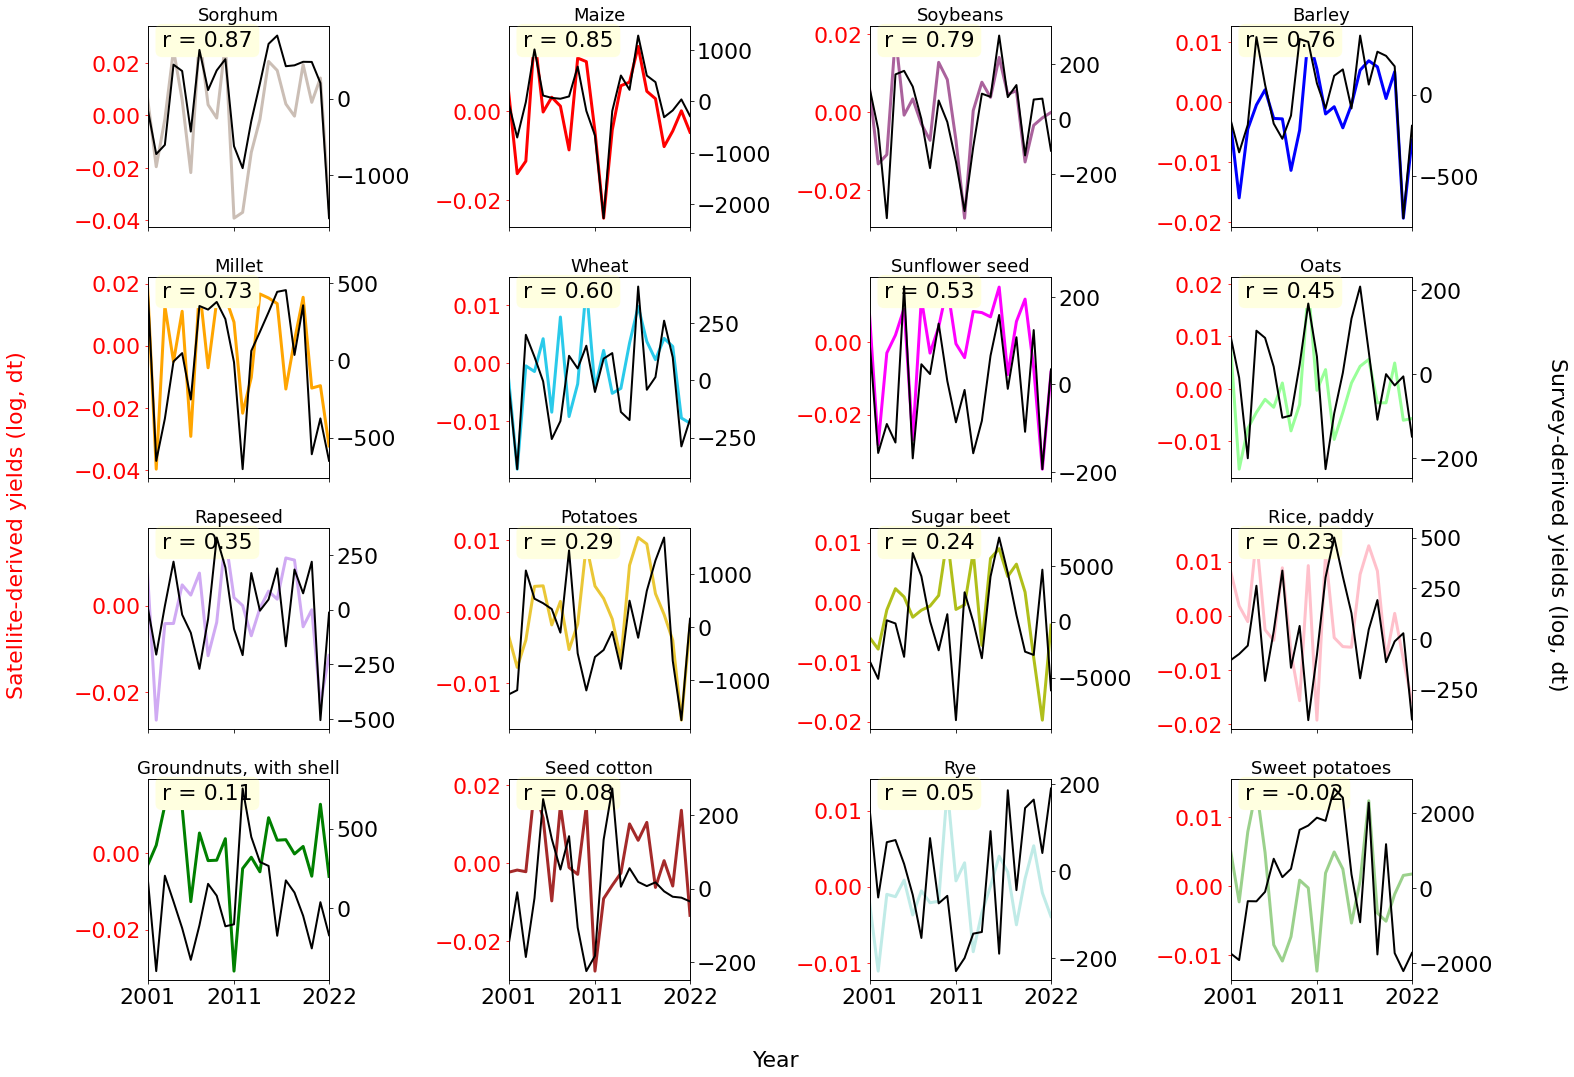

In [4]:
colors1 = ["blue", "green", "red", "orange", "#98ff98", "#eac736", "#d0aaf3", "pink", "#c0ebe7", "brown", "#cbbeb5", "#aa629c", "#b0bf1a", "#ff00ff", "#9bd18c", "#2acaea"]
plot_twin_lines(usa, col="cropname", col_order = sorted_crops, col_wrap=4, 
                grid_kwargs={"hue":"cropname", 'palette': colors1}, plot_kwargs= None, filename="usa_ts_all")

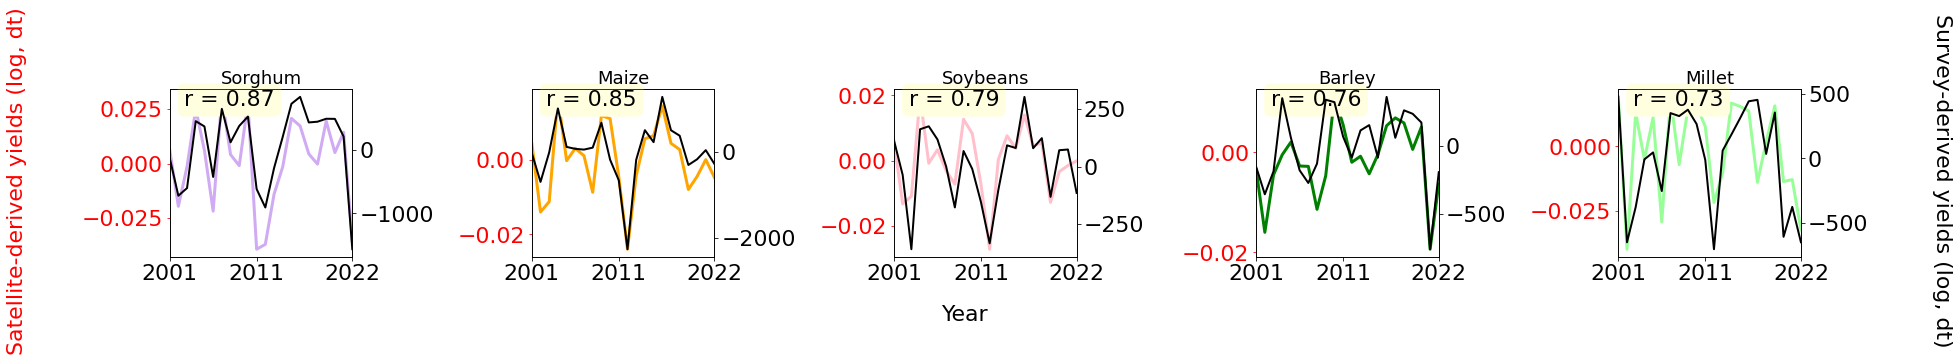

In [5]:
colors2 = ["green", "orange", "#98ff98", "#d0aaf3", "pink"]
best = usa[usa['cropname'].isin(sorted_crops[:5])]
plot_twin_lines(best, col="cropname", col_order = sorted_crops[:5], col_wrap=5, 
                grid_kwargs={"hue":"cropname", 'palette': colors2}, plot_kwargs= None, filename="usa_ts_best")

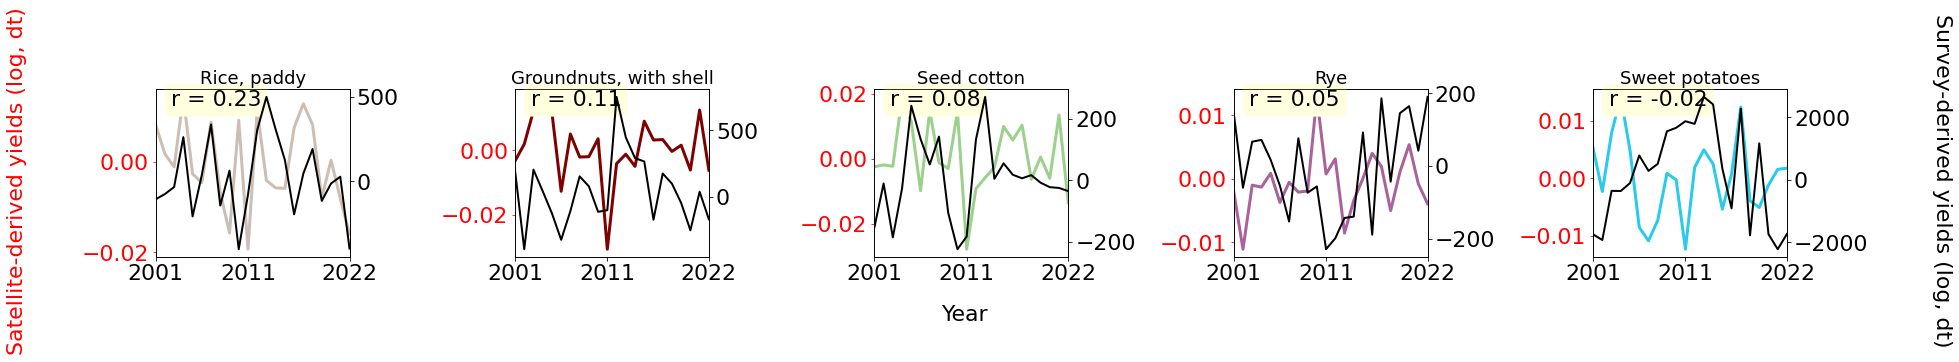

In [6]:
colors3 = ["maroon", "#cbbeb5", "#aa629c", "#9bd18c", "#2acaea"]
worst = usa[usa['cropname'].isin(sorted_crops[-5:])]
plot_twin_lines(worst, col="cropname", col_order = sorted_crops[-5:], col_wrap=5, 
                grid_kwargs={"hue":"cropname", 'palette': colors3}, plot_kwargs= None, filename= "usa_ts_worst")

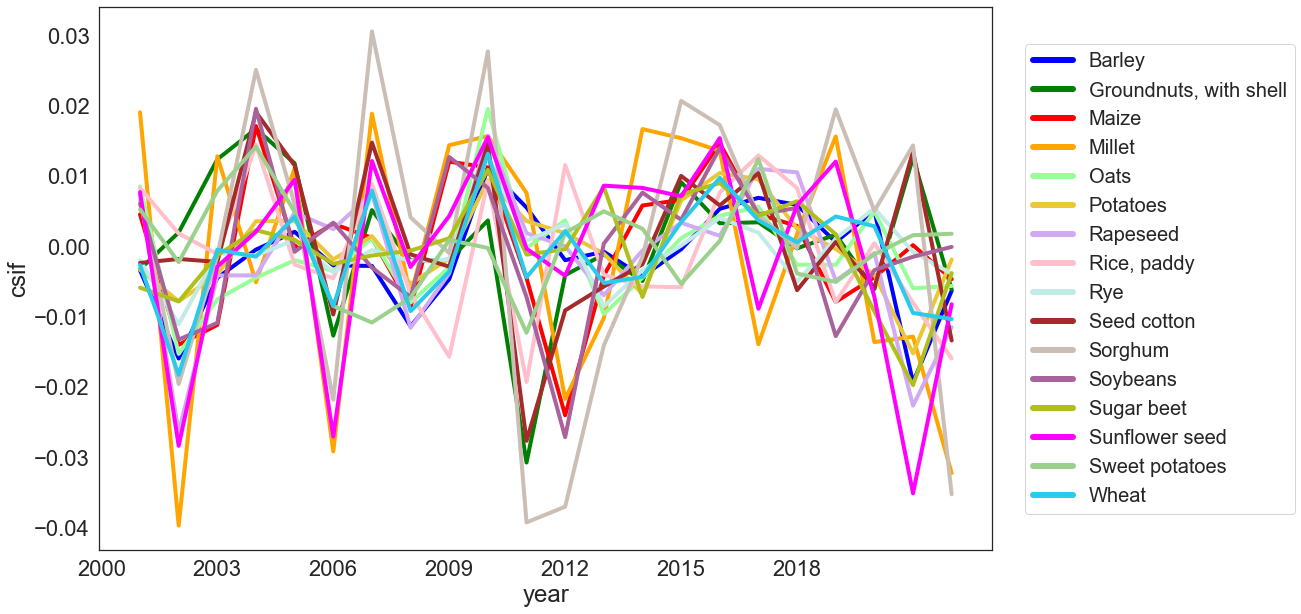

In [7]:
cropnum = len(np.unique(usa['cropname']))
allcrop = usa.copy()
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.lineplot(x='year', y='csif', hue='cropname', data=allcrop, palette=colors1, lw=4)
ax.set(xticks=list( [2000,2003,2006, 2009, 2012, 2015, 2018]))
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(6)
sns.move_legend(ax, "center right",  bbox_to_anchor=(1.35, 0.5), fontsize=20)
plt.savefig("./plots/usa_spaghetti.pdf")